In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# diffusion of AHL
def AHL_diffusion(AHL, D, dt, dx, degradation):
    AHL_new = AHL.copy()
    for i in range(1, AHL.shape[0]-1):
        for j in range(1, AHL.shape[1]-1):
            AHL_new[i,j] = AHL[i,j] + D*dt/dx**2*(AHL[i+1,j]+AHL[i-1,j]+AHL[i,j+1]+AHL[i,j-1]-4*AHL[i,j]) - degradation*AHL[i,j]
            if AHL_new[i,j] < 0:
                AHL_new[i,j] = 0
    return AHL_new

In [4]:
# secretion of AHL
def secret(AHL, cell_state, size, active):
    AHL_new = AHL
    for x,y,v in cell_state:
        AHL_new[int(x)][int(y)] += 1 + active*AHL_new[int(x)][int(y)]
    return AHL_new

In [5]:
# cell run
def run(AHL, cell_state, size):
    # update cell state
    new_cell_state = []
    for x, y, v in cell_state:
        theta = random.random()*2*np.pi
        x += v*np.cos(theta)
        y += v*np.sin(theta)
        # check boundaries
        if x < 0:
            x = 0
            v = -v
        elif x >= size:
            x = size - 1
            v = -v
        if y < 0:
            y = 0
            v = -v
        elif y >= size:
            y = size - 1
            v = -v
        new_cell_state.append((x, y, v))
    cell_state = new_cell_state
    return cell_state

In [6]:
def die(cell_state,AHL):
    new_cell_state = []
    for x,y,v in cell_state:
        # test the concentration of AHL in the cell
        if AHL[x,y] > 0.5:
            # if there is enough AHL, the cell dies
            new_cell_state.append((x,y,0))
    return new_cell_state

In [38]:
# cell growth
def grow(cell_state, size):
    for x,y,v in cell_state:
        p= random.random()
        if p < 0.5:
            cell_state.append((x,y,v))
    return cell_state


In [33]:
# Set up parameters
D=0.01
dx=0.1
dt=0.1
degradation=0.01
AHL_max=100
cell_velocity=1
active=0.1

size = 100  # size of the grid
cell_state=[]
# seed 100 cells in the middle
for i in range(10000):
    cell_state.append([size/2,size/2,cell_velocity])
# concentration of AHL
AHL=np.zeros((size,size))
AHL[int(size/2),int(size/2)]=0

print(cell_state,AHL)

[[50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 1], [50.0, 50.0, 

4992


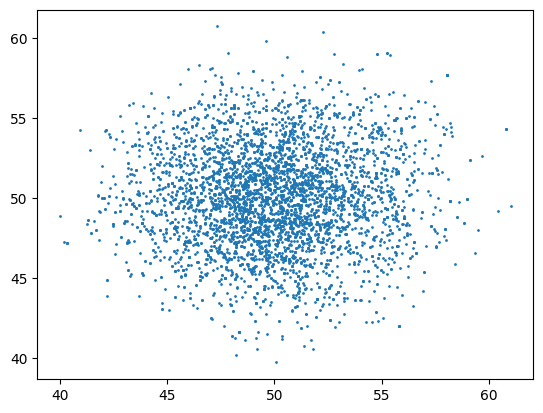

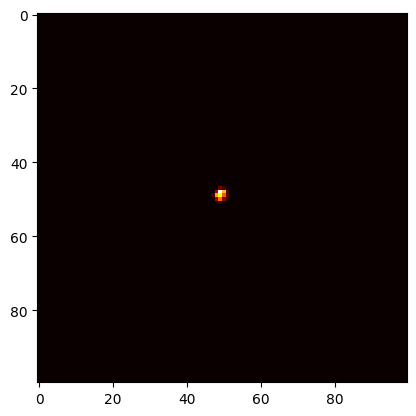

In [56]:
# cell run and die
for i in range(1):
    cell_state=run(AHL, cell_state, size)
    AHL=secret(AHL, cell_state, size, active)
    AHL=AHL_diffusion(AHL, D, dt, dx, degradation)
    cell_state=grow(cell_state, size)
    die_count=0
    for x,y,v in cell_state:
        if AHL[int(x)][int(y)]>AHL_max:
            cell_state.remove((x,y,v))
            die_count=die_count+1

print(die_count)
# plot cell state
x, y, v = zip(*cell_state)
plt.scatter(x, y, s=1)
plt.show()

# plot the concentration of AHL
plt.imshow(AHL, cmap='hot', interpolation='nearest')
plt.show()